In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Chemins vers les images

data_path = os.path.join("..", "data", "processed")

images_covid_path = os.path.join(data_path, "Lung Segmentation Data", "COVID-19", "images")
images_noncovid_path = os.path.join(data_path, "Lung Segmentation Data", "Non-COVID", "images")
images_normal_path = os.path.join(data_path, "Lung Segmentation Data", "Normal", "images")

covid_path = os.path.join(data_path, "Lung Segmentation Data", "COVID-19")
noncovid_path = os.path.join(data_path, "Lung Segmentation Data", "Non-COVID")
normal_path = os.path.join(data_path, "Lung Segmentation Data", "Normal")

masks_covid_path = os.path.join(data_path, "Lung Segmentation Data", "COVID-19", "lung masks")
masks_noncovid_path = os.path.join(data_path, "Lung Segmentation Data", "Non-COVID", "lung masks")
masks_normal_path = os.path.join(data_path, "Lung Segmentation Data", "Normal", "lung masks")

dict_data_path = {
    'COVID' : os.path.join(covid_path, "MinMaxNormalized images"),
    'Non-COVID' : os.path.join(noncovid_path, "MinMaxNormalized images"),
    'Normal' : os.path.join(normal_path, "MinMaxNormalized images")
}

In [3]:
# Définition de la normalization

def normalization(image):
    '''Cette fonction transforme l'image via une normalisation Min-Max'''
    image = image.astype(np.float32) # Transformation en float pour pouvoir faire des calculs

    min_val = np.min(image)
    max_val = np.max(image)

    normalized_image = (image - min_val) / (max_val - min_val) # Normalisation min-max (Entre 0 et 1)
    normalized_image = (normalized_image * 255).astype(np.uint8) # Je retransforme l'image pour qu'elle soit en format uint8
    return normalized_image



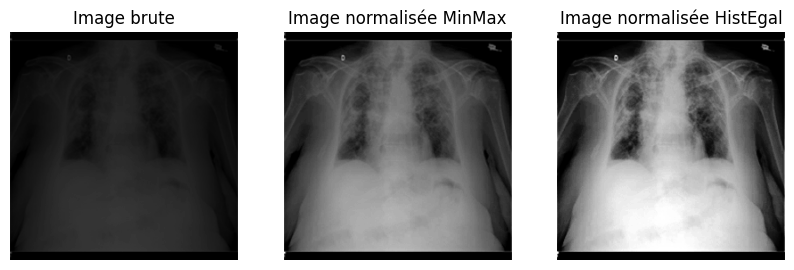

In [4]:
image_200_path = "D:/Nico/Code/MAR24_BDS_Radios_Pulmonaire/data/processed/Lung Segmentation Data/COVID-19/images/covid_200.png"
image_200 = cv2.imread(image_200_path, cv2.IMREAD_GRAYSCALE)

image_200_raw_path = "D:/Nico/Code/MAR24_BDS_Radios_Pulmonaire/data/raw/Lung Segmentation Data/Lung Segmentation Data/Train/COVID-19/images/covid_200.png"
image_200_raw = cv2.imread(image_200_raw_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10,5))
plt.subplot(1,3,2)
plt.title('Image normalisée MinMax')
plt.imshow(normalization(image_200), cmap = 'gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(1,3,1)
plt.title('Image brute')
plt.imshow(image_200_raw, cmap = 'gray', vmin=0, vmax=255); # plt.imshow normalise automatiquement, vmin et vmax permet d'afficher l'image originale
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Image normalisée HistEgal')
plt.imshow(cv2.equalizeHist(image_200_raw), cmap = 'gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

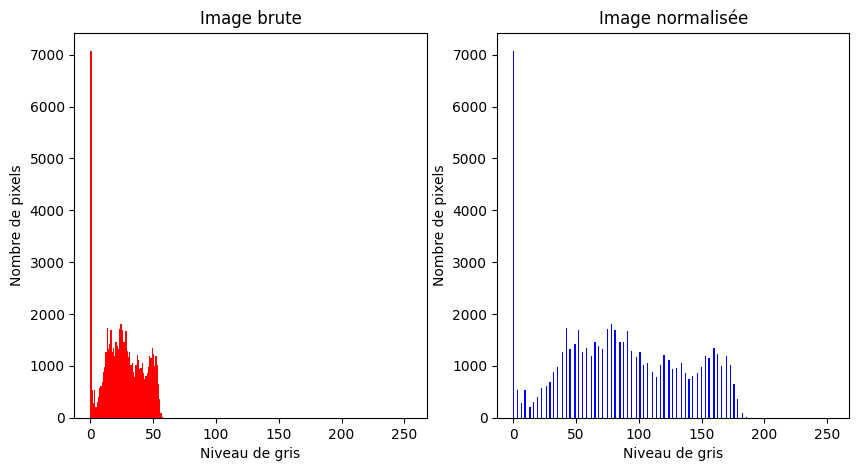

In [11]:
# Vérification de la distribution de l'intensité des pixels

plt.figure(figsize=(10, 5))

# Image originale
plt.subplot(1, 2, 1)
plt.hist(image_200_raw.flatten(), bins=256, range=(0, 255), color='r') # Tableau transformé en liste
plt.title('Image brute')
plt.xlabel('Niveau de gris')
plt.ylabel('Nombre de pixels')

# Image normalisée
normalized_image_200 = normalization(image_200)
plt.subplot(1, 2, 2)
plt.hist(normalized_image_200.flatten(), bins=256, range=(0, 255), color='b')
plt.title('Image normalisée')
plt.xlabel('Niveau de gris')
plt.ylabel('Nombre de pixels')
plt.show()

# On observe en effet une meilleure distribution des niveaux de gris, cependant cela ne va pas jusqu'à 255 (1 ou 2 pixels extrèmement plus clairs que les autres ont du décaler la distribution)

In [31]:
def normalization_from_folder(path):
    '''Cette fonction crée un nouveau dossier nommé "MinMaxNormalized images", et y stocke toutes les images après normalisation Min Max via fonction normalization'''

    MinMaxNormalized_images = "MinMaxNormalized images"
    MinMaxNormalized_images_path = os.path.join(path, MinMaxNormalized_images)

    if not os.path.exists(MinMaxNormalized_images_path):
        os.mkdir(MinMaxNormalized_images_path) # Création du nouveau dossier pour stocker la normalisation si il n'existe pas déjà
    else :
        return

    images_path = os.path.join(path, "images") # Chemin vers le dossier contenant les images

    for image in os.listdir(images_path):
        image_path = os.path.join(images_path, image) # Chemin de l'image
        image_read = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        normalized_image = normalization(image_read) # On crée l'image normalisée
        normalized_image_path = os.path.join(MinMaxNormalized_images_path, image) # On récupère le chemin de l'image

        cv2.imwrite(normalized_image_path, normalized_image) # On met l'image dans le nouveau dossier

In [32]:
normalization_from_folder(covid_path)

In [33]:
normalization_from_folder(noncovid_path)

In [34]:
normalization_from_folder(normal_path)

In [8]:
def normalization_HistEgal(path):
    '''Cette fonction crée un nouveau dossier nommé "HistEgalNormalized images", et y stocke toutes les images après normalisation par égalisation des histogrammes'''

    HistEgalNormalized_images = "HistEgalNormalized images"
    HistEgalNormalized_images_path = os.path.join(path, HistEgalNormalized_images)

    if not os.path.exists(HistEgalNormalized_images_path):
        os.mkdir(HistEgalNormalized_images_path) # Création du nouveau dossier pour stocker la normalisation si il n'existe pas déjà
    else :
        print("Le dossier existe déjà, rien n'a été fait")
        return

    images_path = os.path.join(path, "images") # Chemin vers le dossier contenant les images

    for image in os.listdir(images_path):
        image_path = os.path.join(images_path, image) # Chemin de l'image
        image_read = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        normalized_image = cv2.equalizeHist(image_read) # On crée l'image normalisée
        normalized_image_path = os.path.join(HistEgalNormalized_images_path, image) # On récupère le chemin de l'image

        cv2.imwrite(normalized_image_path, normalized_image) # On met l'image dans le nouveau dossier

In [9]:
normalization_HistEgal(covid_path)
normalization_HistEgal(noncovid_path)
normalization_HistEgal(normal_path)

In [3]:
def apply_clahe_normalization(img):
    """
    Apply CLAHE normalization to an input image.

    Args:
        img (numpy.ndarray): Input image, either in grayscale or RGB format.

    Returns:
        numpy.ndarray: CLAHE normalized image.

    Raises:
        ValueError: If the input image is None or not a valid image.
    """
    if img is None:
        raise ValueError("No image data received!")

    if not isinstance(img, np.ndarray):
        raise ValueError("Input must be a numpy.ndarray")

    # Convert image to grayscale if it's not already
    if len(img.shape) == 3 and img.shape[2] == 3:  # RGB image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    elif len(img.shape) != 2:  # Not a grayscale or RGB image
        raise ValueError("Input image must be either grayscale or RGB")

    # Ensure image is of type uint8 (required for CLAHE)
    if img.dtype != np.uint8:
        img = img.astype('uint8')

    # Apply CLAHE transformation
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img = clahe.apply(img)

    return img

def normalization_CLAHE(path):
    '''Cette fonction crée un nouveau dossier nommé "CLAHE images", et y stocke toutes les images après CLAHE'''

    CLAHE_images = "CLAHE images"
    CLAHE_images_path = os.path.join(path, CLAHE_images)

    if not os.path.exists(CLAHE_images_path):
        os.mkdir(CLAHE_images_path) # Création du nouveau dossier pour stocker la normalisation si il n'existe pas déjà
    else :
        print("Le dossier existe déjà, rien n'a été fait")
        return

    images_path = os.path.join(path, "images") # Chemin vers le dossier contenant les images

    for image in os.listdir(images_path):
        image_path = os.path.join(images_path, image) # Chemin de l'image
        image_read = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        normalized_image = apply_clahe_normalization(image_read) # On crée l'image normalisée
        normalized_image_path = os.path.join(CLAHE_images_path, image) # On récupère le chemin de l'image

        cv2.imwrite(normalized_image_path, normalized_image) # On met l'image dans le nouveau dossier

In [4]:
normalization_CLAHE(covid_path)

In [5]:
normalization_CLAHE(noncovid_path)
normalization_CLAHE(normal_path)

In [43]:
png_data = []

for key, path in dict_data_path.items():
    png_list = []

    for png_file in os.listdir(path):

        png_path = os.path.join(path, png_file)

        # chargement de l'image avec OpenCV en niveau de gris
        png = cv2.imread(png_path, cv2.IMREAD_GRAYSCALE) 

        # caracteristiques de l'image
        height, width = png.shape
        channels = 1  # Niveaux de gris
        mean_intensity = np.mean(png)
        std_intensity = np.std(png)
        min_intensity = np.min(png)
        max_intensity = np.max(png)

        png_data.append({
            "data": key, 
            "Png name": png_file,
            "Hauteur": height,
            "Largeur": width,
            "Canaux": channels,
            "Intensité moyenne": mean_intensity,
            "Ecart type Intensité": std_intensity,
            "Min Intensité": min_intensity,
            "Max Intensité": max_intensity
        })
        
        # enregistrement de l'image dans la liste
        png_list.append(png)

df_descr_png = pd.DataFrame(png_data)

In [44]:
def display_distrib_int_pixels(df, titre):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    axes = axes.flatten()

    for i, (data, group) in enumerate(df.groupby('data')):
        q1 = group['Intensité moyenne'].quantile(0.25)
        median = group['Intensité moyenne'].median()
        q3 = group['Intensité moyenne'].quantile(0.75)
        moy = group['Intensité moyenne'].mean()
        sd = group['Intensité moyenne'].std()

        ax = axes[i]  # Select the current subplot

        sns.histplot(data=group, x='Intensité moyenne', kde=True, ax=ax)

        ax.set_title(f'{data}')
        ax.set_xlabel('Intensité moyenne')
        ax.set_ylabel('Frequency')

        # info distrib : 
        ax.text(0.95, 0.95, f'Q1: {q1:.2f}', ha='right', va='top', transform=ax.transAxes)
        ax.text(0.95, 0.85, f'Median: {median:.2f}', ha='right', va='top', transform=ax.transAxes)
        ax.text(0.95, 0.75, f'Q3: {q3:.2f}', ha='right', va='top', transform=ax.transAxes)
        ax.text(0.95, 0.65, f'Moyenne: {moy:.2f}', ha='right', va='top', transform=ax.transAxes)
        ax.text(0.95, 0.55, f'Std: {sd:.2f}', ha='right', va='top', transform=ax.transAxes)

    # plt.tight_layout() # Adjust layout to prevent overlap of subplot titles
    fig.suptitle(titre, fontsize=16)
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.5, wspace=0.5)

    plt.show()

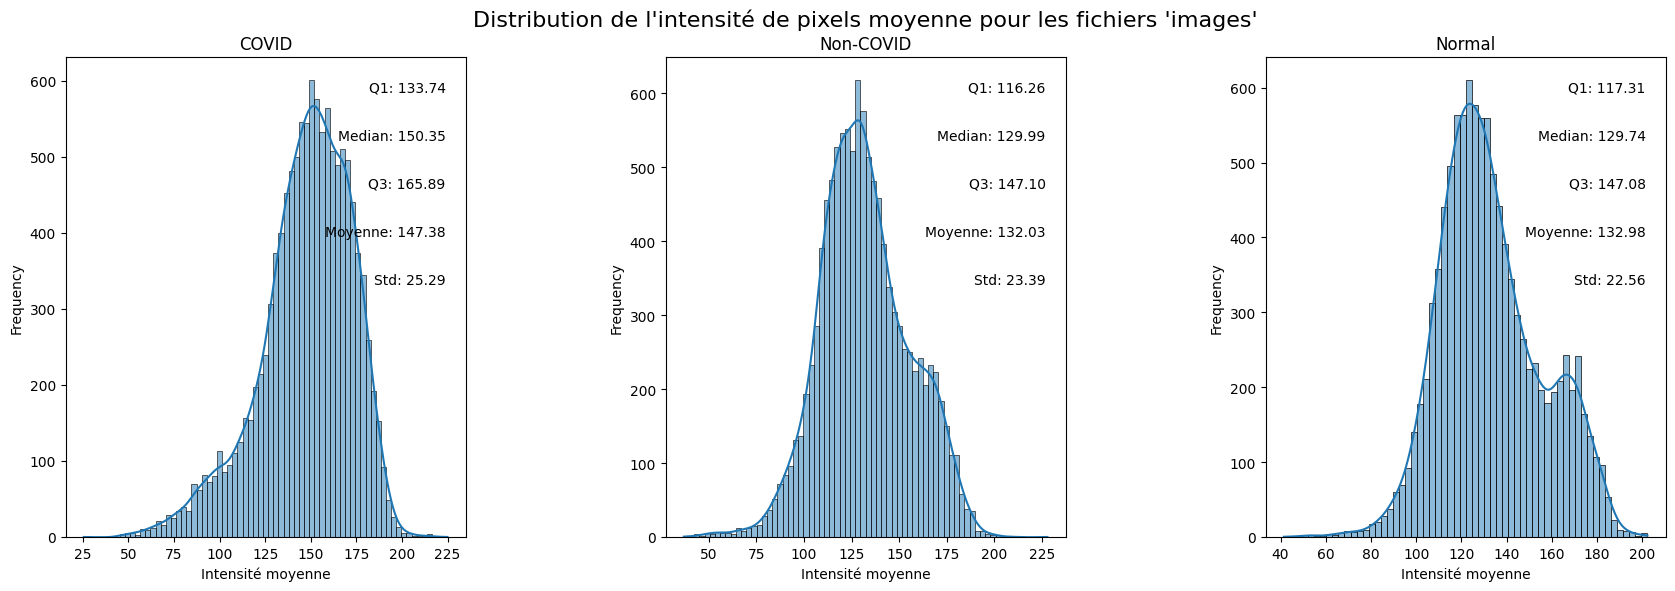

In [45]:
display_distrib_int_pixels(df_descr_png, "Distribution de l'intensité de pixels moyenne pour les fichiers 'images'")

La normalisation Min-Max augmente la valeur de l'ensemble des descripteurs, cependant cela écarte encore plus le set COVID des deux autres sets, ce qui n'était pas le but à l'étape de normalisation.

Pour comparer, les moyennes étaient respectivement de 137.6, 125.6, 129.27 et les médianes de 141.06, 122.15 et 125.79


Le problème de normaliser en utilisant la moyenne est que les images contenant une importante partie noire (qui n'appartient pas à la radio) vont être "trop" corrigées

In [14]:
# Application des masks sur les images

def application_masks(image,mask):
    '''Cette fonction prend une image et applique le masque de même nom pour ne faire ressortir que les poumons'''
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

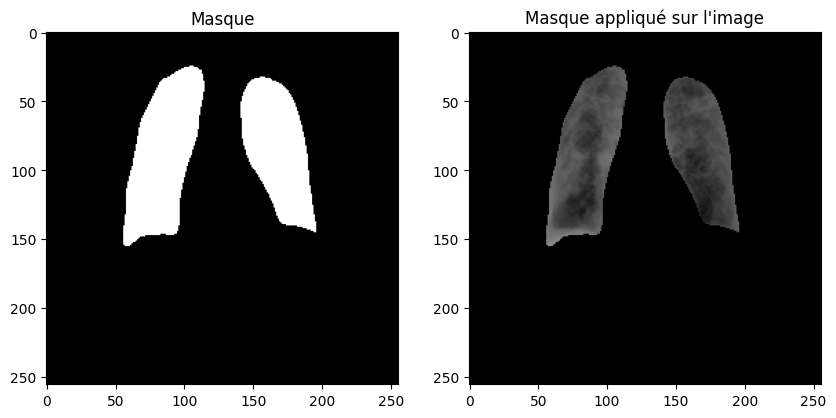

In [12]:
mask_200_path = "D:/Nico/Code/MAR24_BDS_Radios_Pulmonaire/data/processed/Lung Segmentation Data/COVID-19/lung masks/covid_200.png"
mask_200 = cv2.imread(mask_200_path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Masque')
plt.imshow(mask_200, cmap = 'gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title('Masque appliqué sur l\'image')
plt.imshow(application_masks(normalized_image_200, mask_200), cmap = 'gray', vmin=0, vmax=255)
plt.show()


In [13]:
def application_masks_from_folder(path):
    '''Cette fonction applique les masques sur toutes les images d'un dossier. 
    Elle crée un nouveau dossier pour stocker les images résultantes'''

    masks_applicated = "masks_applicated"
    masks_applicated_path = os.path.join(path, masks_applicated)

    if not os.path.exists(masks_applicated_path):
        os.mkdir(masks_applicated_path) # Création du nouveau dossier pour stocker la combinaison si il n'existe pas déjà
    else :
        return
    
    images_path = os.path.join(path, "images") # Chemin vers le dossier contenant les images
    masks_path = os.path.join(path, "lung masks") # Chemin vers le dossier contenant les masques

    for image in os.listdir(images_path):
        image_path = os.path.join(images_path, image) # Chemin de l'image
        image_read = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        mask_path = os.path.join(masks_path, image) # Chemin du mask qui porte le même nom que l'image
        mask_read = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        result_image = application_masks(image_read, mask_read) # On applique le mask sur l'image
        result_image_path = os.path.join(masks_applicated_path, image) # On récupère le chemin de l'image

        cv2.imwrite(result_image_path, result_image) # On met l'image dans le nouveau dossier
        

In [16]:
application_masks_from_folder(covid_path)

In [17]:
application_masks_from_folder(noncovid_path)

In [18]:
application_masks_from_folder(normal_path)

Pour perdre moins d'information, il faudrait zoomer les masks.
Cependant faire un simple zoom sur le centre de l'image nous fera perdre de l'inforamtion, il faudrait faire grossir juste les formes -> Dilatation via cv2.dilate

In [4]:
def mask_dilatation(mask, iterations):
    kernel = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0]
    ], dtype=np.uint8)

    dilated_mask = cv2.dilate(mask, kernel, iterations = iterations)
    return dilated_mask


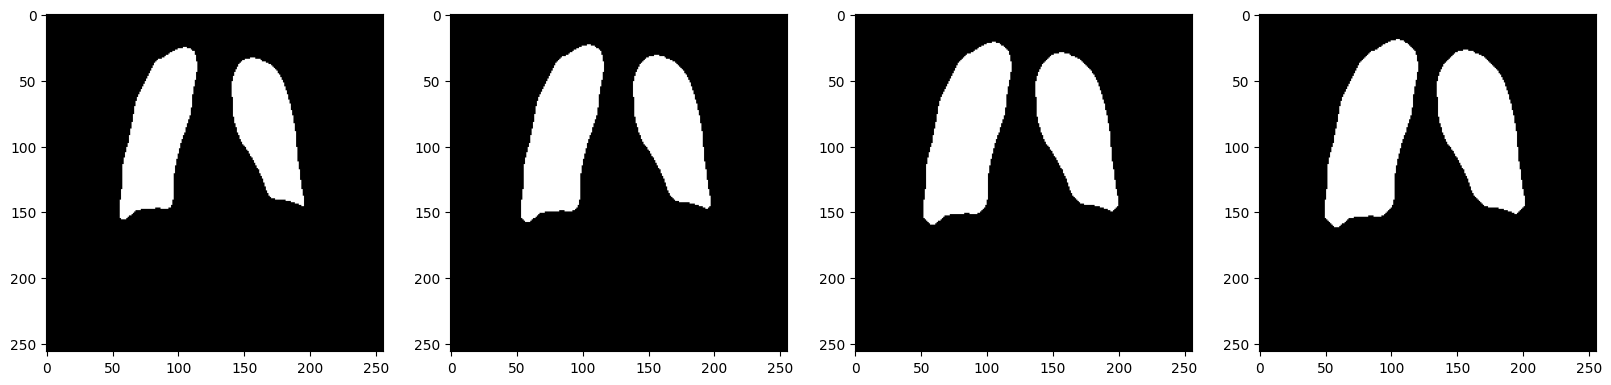

In [40]:
mask_200_1 = mask_dilatation(mask_200, 1)
mask_200_2 = mask_dilatation(mask_200, 2)
mask_200_3 = mask_dilatation(mask_200, 3)
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(mask_200, cmap = 'gray', vmin=0, vmax=255);
plt.subplot(1, 4, 2)
plt.imshow(mask_200_1, cmap = 'gray', vmin=0, vmax=255);
plt.subplot(1, 4, 3)
plt.imshow(mask_200_2, cmap = 'gray', vmin=0, vmax=255);
plt.subplot(1, 4, 4)
plt.imshow(mask_200_3, cmap = 'gray', vmin=0, vmax=255);

<Figure size 1000x500 with 0 Axes>

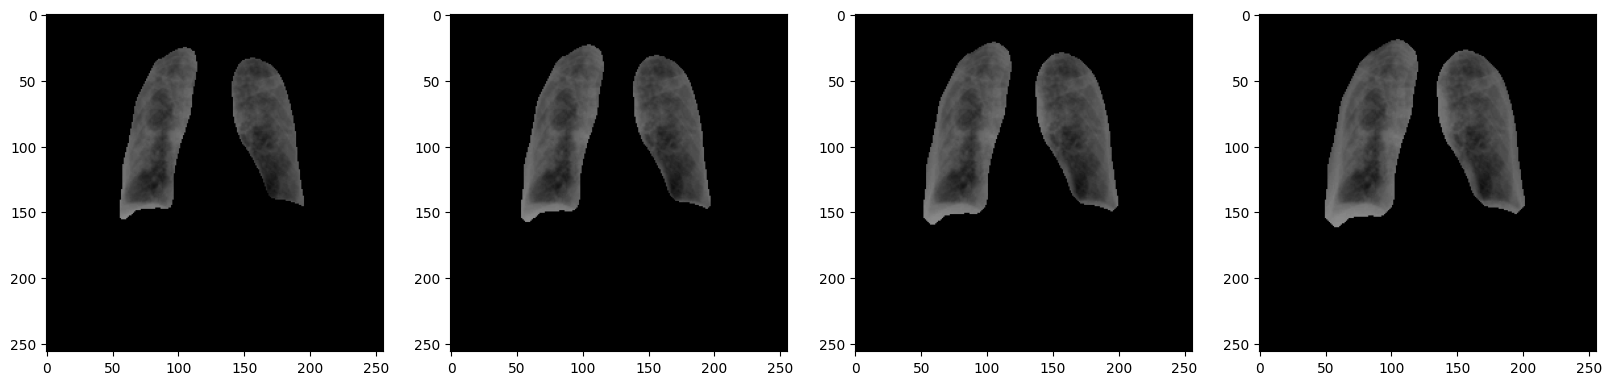

In [41]:

plt.figure(figsize=(10, 5))  # Définir la taille de la figure
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(application_masks(image_200, mask_200), cmap = 'gray', vmin=0, vmax=255);
plt.subplot(1, 4, 2)
plt.imshow(application_masks(image_200, mask_200_1), cmap = 'gray', vmin=0, vmax=255);
plt.subplot(1, 4, 3)
plt.imshow(application_masks(image_200, mask_200_2), cmap = 'gray', vmin=0, vmax=255);
plt.subplot(1, 4, 4)
plt.imshow(application_masks(image_200, mask_200_3), cmap = 'gray', vmin=0, vmax=255);

Les masques semblent légèrement restrictifs (Une itération sur ce noyau semble correcte)

#### On va créer un nouveau dossier avec une itération de dilatation

In [1]:
def dilatation_1_masks(path):
    '''Cette fonction crée un nouveau dossier nommé "lung masks dilatation1", et y stocke tous les masks après une dilatation via la fonction mask_dilatation'''

    lung_masks_dilatation1 = "lung masks dilatation1"
    lung_masks_dilatation1_path = os.path.join(path, lung_masks_dilatation1)

    if not os.path.exists(lung_masks_dilatation1_path):
        os.mkdir(lung_masks_dilatation1_path) # Création du nouveau dossier pour stocker la dilatation si il n'existe pas déjà
    else :
        print("Le dossier existe déjà, la dilatation n'a pas été effectuée")
        return

    masks_path = os.path.join(path, "lung masks") # Chemin vers le dossier contenant les masques originaux

    for mask in os.listdir(masks_path):
        mask_path = os.path.join(masks_path, mask) # Chemin de du mask
        mask_read = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        dilatation1_mask = mask_dilatation(mask_read, 1) # On dilate le masque 1 fois
        dilatation1_mask_path = os.path.join(lung_masks_dilatation1_path, mask) # On récupère le chemin de l'image

        cv2.imwrite(dilatation1_mask_path, dilatation1_mask) # On met l'image dans le nouveau dossier

In [5]:
dilatation_1_masks(covid_path)

In [6]:
dilatation_1_masks(noncovid_path)

In [7]:
dilatation_1_masks(normal_path)

#### On va créer encore un nouveau dossier avec cette fois deux itérations de dilatation

In [8]:
def dilatation_2_masks(path):
    '''Cette fonction crée un nouveau dossier nommé "lung masks dilatation2", et y stocke tous les masks après deux dilatations via la fonction mask_dilatation'''

    lung_masks_dilatation2 = "lung masks dilatation2"
    lung_masks_dilatation2_path = os.path.join(path, lung_masks_dilatation2)

    if not os.path.exists(lung_masks_dilatation2_path):
        os.mkdir(lung_masks_dilatation2_path) # Création du nouveau dossier pour stocker la dilatation si il n'existe pas déjà
    else :
        print("Le dossier existe déjà, la dilatation n'a pas été effectuée")
        return

    masks_path = os.path.join(path, "lung masks") # Chemin vers le dossier contenant les masques originaux

    for mask in os.listdir(masks_path):
        mask_path = os.path.join(masks_path, mask) # Chemin de du mask
        mask_read = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        dilatation2_mask = mask_dilatation(mask_read, 2) # On dilate le masque 2 fois
        dilatation2_mask_path = os.path.join(lung_masks_dilatation2_path, mask) # On récupère le chemin de l'image

        cv2.imwrite(dilatation2_mask_path, dilatation2_mask) # On met l'image dans le nouveau dossier

In [9]:
dilatation_2_masks(covid_path)

In [10]:
dilatation_2_masks(noncovid_path)

In [11]:
dilatation_2_masks(normal_path)

Application des masques dilatés sur les images

In [12]:
def application_dilated1_masks_from_folder(path):
    '''Cette fonction applique les masques dilatés une fois sur toutes les images d'un dossier. 
    Elle crée un nouveau dossier pour stocker les images résultantes'''

    masks_dilated1_applicated = "masks_dilated1_applicated"
    masks_dilated1_applicated_path = os.path.join(path, masks_dilated1_applicated)

    if not os.path.exists(masks_dilated1_applicated_path):
        os.mkdir(masks_dilated1_applicated_path) # Création du nouveau dossier pour stocker la combinaison si il n'existe pas déjà
    else :
        print("Le dossier existe déjà, l'application des masques dilatés n'a pas été effectuée")
        return
    
    images_path = os.path.join(path, "images") # Chemin vers le dossier contenant les images
    masks_path = os.path.join(path, "lung masks dilatation1") # Chemin vers le dossier contenant les masques dilatés

    for image in os.listdir(images_path):
        image_path = os.path.join(images_path, image) # Chemin de l'image
        image_read = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        mask_path = os.path.join(masks_path, image) # Chemin du mask qui porte le même nom que l'image
        mask_read = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        result_image = application_masks(image_read, mask_read) # On applique le mask sur l'image
        result_image_path = os.path.join(masks_dilated1_applicated_path, image) # On récupère le chemin de l'image

        cv2.imwrite(result_image_path, result_image) # On met l'image dans le nouveau dossier

In [16]:
application_dilated1_masks_from_folder(covid_path)
application_dilated1_masks_from_folder(noncovid_path)
application_dilated1_masks_from_folder(normal_path)

Le dossier existe déjà, l'application des masques dilatés n'a pas été effectuée
Le dossier existe déjà, l'application des masques dilatés n'a pas été effectuée


In [17]:
def application_dilated2_masks_from_folder(path):
    '''Cette fonction applique les masques dilatés deux fois sur toutes les images d'un dossier. 
    Elle crée un nouveau dossier pour stocker les images résultantes'''

    masks_dilated2_applicated = "masks_dilated2_applicated"
    masks_dilated2_applicated_path = os.path.join(path, masks_dilated2_applicated)

    if not os.path.exists(masks_dilated2_applicated_path):
        os.mkdir(masks_dilated2_applicated_path) # Création du nouveau dossier pour stocker la combinaison si il n'existe pas déjà
    else :
        print("Le dossier existe déjà, l'application des masques dilatés n'a pas été effectuée")
        return
    
    images_path = os.path.join(path, "images") # Chemin vers le dossier contenant les images
    masks_path = os.path.join(path, "lung masks dilatation2") # Chemin vers le dossier contenant les masques dilatés

    for image in os.listdir(images_path):
        image_path = os.path.join(images_path, image) # Chemin de l'image
        image_read = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        mask_path = os.path.join(masks_path, image) # Chemin du mask qui porte le même nom que l'image
        mask_read = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        result_image = application_masks(image_read, mask_read) # On applique le mask sur l'image
        result_image_path = os.path.join(masks_dilated2_applicated_path, image) # On récupère le chemin de l'image

        cv2.imwrite(result_image_path, result_image) # On met l'image dans le nouveau dossier

In [18]:
application_dilated2_masks_from_folder(covid_path)
application_dilated2_masks_from_folder(noncovid_path)
application_dilated2_masks_from_folder(normal_path)